#Dataset Download

In [ ]:
!pip install gdown
!pip install hyperactive

In [ ]:
#Download Dataset
!gdown https://drive.google.com/uc?id=1vlZpEth-He87cuAKLWAsPOD2ql_x5cCk

#unzip downloaded data
!unzip tomatoleaf.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Preprosesing

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2

np.random.seed(1)
from tensorflow.compat.v1 import set_random_seed
set_random_seed(2)


import albumentations as albu
from albumentations import Compose, ShiftScaleRotate, Resize
from albumentations.pytorch import ToTensor

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report

import shutil

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_CHANNELS = 3


In [ ]:
base_train = "/content/tomato/train"

Bacterial_spot = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy = os.listdir(base_train + "/Tomato___healthy")

print(len(Bacterial_spot))
print(len(Early_blight))
print(len(Late_blight))
print(len(Leaf_mold))
print(len(Septoria_leaf_spot))
print(len(Spider_mites))
print(len(Target_Spot))
print(len(Tomato_Yellow_Leaf_Curl_Virus))
print(len(Mosaic_virus))
print(len(Healthy))

In [ ]:
base_train = "/content/tomato/val"

Bacterial_spot_val = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight_val = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight_val = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold_val = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot_val = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites_val = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot_val = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus_val = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus_val = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy_val = os.listdir(base_train + "/Tomato___healthy")

print(len(Bacterial_spot_val))
print(len(Early_blight_val))
print(len(Late_blight_val))
print(len(Leaf_mold_val))
print(len(Septoria_leaf_spot_val))
print(len(Spider_mites_val))
print(len(Target_Spot_val))
print(len(Tomato_Yellow_Leaf_Curl_Virus_val))
print(len(Mosaic_virus_val))
print(len(Healthy))

##Data train

In [ ]:
# Create the train and val sets

df_Bacterial_spot_train = pd.DataFrame(Bacterial_spot, columns=['image'])
df_Bacterial_spot_train['target'] = 'Bacterial_spot'

df_Early_blight_train = pd.DataFrame(Early_blight, columns=['image'])
df_Early_blight_train['target'] = 'Early_blight'

df_Late_blight_train = pd.DataFrame(Late_blight, columns=['image'])
df_Late_blight_train['target'] = 'Late_blight'

df_Leaf_mold_train = pd.DataFrame(Leaf_mold, columns=['image'])
df_Leaf_mold_train['target'] = 'Leaf_mold'

df_Septoria_leaf_spot_train = pd.DataFrame(Septoria_leaf_spot, columns=['image'])
df_Septoria_leaf_spot_train['target'] = 'Septoria_leaf_spot'

df_Spider_mites_train = pd.DataFrame(Spider_mites, columns=['image'])
df_Spider_mites_train['target'] = 'Spider_mites'

df_Target_Spot_train = pd.DataFrame(Target_Spot, columns=['image'])
df_Target_Spot_train['target'] = 'Target_Spot'

df_Tomato_Yellow_Leaf_Curl_Virus_train = pd.DataFrame(Tomato_Yellow_Leaf_Curl_Virus, columns=['image'])
df_Tomato_Yellow_Leaf_Curl_Virus_train['target'] = 'Tomato_Yellow_Leaf_Curl_Virus'

df_Mosaic_virus_train = pd.DataFrame(Mosaic_virus, columns=['image'])
df_Mosaic_virus_train['target'] = 'Mosaic_virus'

df_Healthy_train = pd.DataFrame(Healthy, columns=['image'])
df_Healthy_train['target'] = 'Healthy'



# Sample 5 validation images from each class


print(len(df_Bacterial_spot_train))
print(len(df_Early_blight_train))
print(len(df_Late_blight_train))
print(len(df_Leaf_mold_train))
print(len(df_Septoria_leaf_spot_train))
print(len(df_Spider_mites_train))
print(len(df_Target_Spot_train))
print(len(df_Tomato_Yellow_Leaf_Curl_Virus_train))
print(len(df_Mosaic_virus_train))
print(len(df_Healthy_train))

##Data validasi

In [ ]:
# Create the train and val sets

df_Bacterial_spot_val = pd.DataFrame(Bacterial_spot_val, columns=['image'])
df_Bacterial_spot_val['target'] = 'Bacterial_spot'

df_Early_blight_val = pd.DataFrame(Early_blight_val, columns=['image'])
df_Early_blight_val['target'] = 'Early_blight'

df_Late_blight_val = pd.DataFrame(Late_blight_val, columns=['image'])
df_Late_blight_val['target'] = 'Late_blight'

df_Leaf_mold_val = pd.DataFrame(Leaf_mold_val, columns=['image'])
df_Leaf_mold_val['target'] = 'Leaf_mold'

df_Septoria_leaf_spot_val = pd.DataFrame(Septoria_leaf_spot_val, columns=['image'])
df_Septoria_leaf_spot_val['target'] = 'Septoria_leaf_spot'

df_Spider_mites_val = pd.DataFrame(Spider_mites_val, columns=['image'])
df_Spider_mites_val['target'] = 'Spider_mites'

df_Target_Spot_val = pd.DataFrame(Target_Spot_val, columns=['image'])
df_Target_Spot_val['target'] = 'Target_Spot'

df_Tomato_Yellow_Leaf_Curl_Virus_val = pd.DataFrame(Tomato_Yellow_Leaf_Curl_Virus_val, columns=['image'])
df_Tomato_Yellow_Leaf_Curl_Virus_val['target'] = 'Tomato_Yellow_Leaf_Curl_Virus'

df_Mosaic_virus_val = pd.DataFrame(Mosaic_virus_val, columns=['image'])
df_Mosaic_virus_val['target'] = 'Mosaic_virus'

df_Healthy_val = pd.DataFrame(Healthy_val, columns=['image'])
df_Healthy_val['target'] = 'Healthy'



# Sample 5 validation images from each class


print(len(df_Bacterial_spot_val))
print(len(df_Early_blight_val))
print(len(df_Late_blight_val))
print(len(df_Leaf_mold_val))
print(len(df_Septoria_leaf_spot_val))
print(len(df_Spider_mites_val))
print(len(df_Target_Spot_val))
print(len(df_Tomato_Yellow_Leaf_Curl_Virus_val))
print(len(df_Mosaic_virus_val))
print(len(df_Healthy_val))

In [ ]:
# Create df_data, df_train and df_val


# df_data = pd.concat([df_Bacterial_spot, \
#                      df_Early_blight, \
#                      df_Late_blight, \
#                      df_Leaf_mold, \
#                      df_Septoria_leaf_spot, \
#                      df_Spider_mites, \
#                      df_Target_Spot, \
#                      df_Tomato_Yellow_Leaf_Curl_Virus, \
#                      df_Mosaic_virus, \
#                      df_Healthy], axis=0).reset_index(drop=True)


df_train = pd.concat([df_Bacterial_spot_train, \
                     df_Early_blight_train, \
                     df_Late_blight_train, \
                     df_Leaf_mold_train, \
                     df_Septoria_leaf_spot_train, \
                     df_Spider_mites_train, \
                     df_Target_Spot_train, \
                     df_Tomato_Yellow_Leaf_Curl_Virus_train, \
                     df_Mosaic_virus_train, \
                     df_Healthy_train], axis=0).reset_index(drop=True)

df_val = pd.concat([df_Bacterial_spot_val, \
                     df_Early_blight_val, \
                     df_Late_blight_val, \
                     df_Leaf_mold_val, \
                     df_Septoria_leaf_spot_val, \
                     df_Spider_mites_val, \
                     df_Target_Spot_val, \
                     df_Tomato_Yellow_Leaf_Curl_Virus_val, \
                     df_Mosaic_virus_val, \
                     df_Healthy_val], axis=0).reset_index(drop=True)

#df_data = shuffle(df_data)
df_train = shuffle(df_train)
df_val = shuffle(df_val)

#print(df_data.shape)
print(df_train.shape)
print(df_val.shape)

In [ ]:
df_train['target'].value_counts()

In [ ]:
df_val['target'].value_counts()

Transform the target
Here we will one hot encode the target classes.

In [ ]:
# Create the target as index values

# combine val, train and test
val_len = len(df_val)
train_len = len(df_train)
df_combined =  pd.concat(objs=[df_val, df_train], axis=0).reset_index(drop=True)

# create the dummy variables
df_combined = pd.get_dummies(df_combined, columns=['target'])

# separate the train and val sets
df_val = df_combined[:val_len]
df_train = df_combined[val_len:]


print(df_train.shape)
print(df_val.shape)

In [ ]:
df_combined.head()

In [ ]:
df_train.head()

In [ ]:
df_val.head()

In [ ]:
#Save the dataframes as compressed csv files for later used

df_combined.to_csv('df_combined.csv.gz', compression='gzip', index=False)

df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

Image Aug Preview

In [ ]:
# Pneumothorax - 1st place solution
# Source: https://www.kaggle.com/c/siim-acr-pneumothorax-segmentation/discussion/107824#latest-620521

# Albumentations

import albumentations as albu


def augment_image(augmentation, image):

    """
    Uses the Albumentations library.

    Inputs:
    1. augmentation - this is the instance of type of augmentation to do
    e.g. aug_type = HorizontalFlip(p=1)
    # p=1 is the probability of the transform being executed.

    2. image - image with shape (h,w)

    Output:
    Augmented image as a numpy array.

    """
    # get the transform as a dict
    aug_image_dict =  augmentation(image=image)
    # retrieve the augmented matrix of the image
    image_matrix = aug_image_dict['image']


    return image_matrix

In [ ]:
# Define the transforms


aug_types = albu.Compose([
            albu.HorizontalFlip(),
             albu.OneOf([
                albu.HorizontalFlip(),
                albu.VerticalFlip(),
                ], p=0.8),
            albu.OneOf([
                albu.RandomContrast(),
                albu.RandomGamma(),
                albu.RandomBrightness(),
                ], p=0.3),
            albu.OneOf([
                albu.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
                albu.GridDistortion(),
                albu.OpticalDistortion(distort_limit=2, shift_limit=0.5),
                ], p=0.3),
            albu.ShiftScaleRotate()
            ])

In [ ]:
# Create a new image directory
image_dir = 'image_dir'
os.mkdir(image_dir)

!ls

In [ ]:
base_train = "/content/tomato/train"

Bacterial_spot = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy = os.listdir(base_train + "/Tomato___healthy")



# Transfer the Bacterial_spot images
for fname in Bacterial_spot:

    path = base_train + "/Tomato___Bacterial_spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Early_blight images
for fname in Early_blight:

    path = base_train + "/Tomato___Early_blight"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Late_blight images
for fname in Late_blight:

    path = base_train + "/Tomato___Late_blight"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Leaf_mold images
for fname in Leaf_mold:

    path = base_train + "/Tomato___Leaf_Mold"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Septoria_leaf_spot images
for fname in Septoria_leaf_spot:

    path = base_train + "/Tomato___Septoria_leaf_spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Spider_mites images
for fname in Spider_mites:

    path = base_train + "/Tomato___Spider_mites Two-spotted_spider_mite"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Target_Spot images
for fname in Target_Spot:

    path = base_train + "/Tomato___Target_Spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Tomato_Yellow_Leaf_Curl_Virus images
for fname in Tomato_Yellow_Leaf_Curl_Virus:

    path = base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Mosaic_virus images
for fname in Mosaic_virus:

    path = base_train + "/Tomato___Tomato_mosaic_virus"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Healthy images
for fname in Healthy:

    path = base_train + "/Tomato___healthy"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)



In [ ]:
base_train = "/content/tomato/val"

Bacterial_spot = os.listdir(base_train + "/Tomato___Bacterial_spot")
Early_blight = os.listdir(base_train + "/Tomato___Early_blight")
Late_blight = os.listdir(base_train + "/Tomato___Late_blight")
Leaf_mold = os.listdir(base_train + "/Tomato___Leaf_Mold")
Septoria_leaf_spot = os.listdir(base_train + "/Tomato___Septoria_leaf_spot")
Spider_mites = os.listdir(base_train + "/Tomato___Spider_mites Two-spotted_spider_mite")
Target_Spot = os.listdir(base_train + "/Tomato___Target_Spot")
Tomato_Yellow_Leaf_Curl_Virus = os.listdir(base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus")
Mosaic_virus = os.listdir(base_train + "/Tomato___Tomato_mosaic_virus")
Healthy = os.listdir(base_train + "/Tomato___healthy")



# Transfer the Bacterial_spot images
for fname in Bacterial_spot:

    path = base_train + "/Tomato___Bacterial_spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Early_blight images
for fname in Early_blight:

    path = base_train + "/Tomato___Early_blight"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Late_blight images
for fname in Late_blight:

    path = base_train + "/Tomato___Late_blight"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Leaf_mold images
for fname in Leaf_mold:

    path = base_train + "/Tomato___Leaf_Mold"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Septoria_leaf_spot images
for fname in Septoria_leaf_spot:

    path = base_train + "/Tomato___Septoria_leaf_spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Spider_mites images
for fname in Spider_mites:

    path = base_train + "/Tomato___Spider_mites Two-spotted_spider_mite"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Target_Spot images
for fname in Target_Spot:

    path = base_train + "/Tomato___Target_Spot"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Tomato_Yellow_Leaf_Curl_Virus images
for fname in Tomato_Yellow_Leaf_Curl_Virus:

    path = base_train + "/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Mosaic_virus images
for fname in Mosaic_virus:

    path = base_train + "/Tomato___Tomato_mosaic_virus"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)


# Transfer the Healthy images
for fname in Healthy:

    path = base_train + "/Tomato___healthy"

    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)



In [ ]:
len(os.listdir('image_dir'))

11000

In [ ]:
# Get an image to test transformations

# get a list of train png images
path = 'image_dir/'
image_list = os.listdir('image_dir')

fname = image_list[1]
image_path = path + fname

image = plt.imread(image_path)
plt.imshow(image)

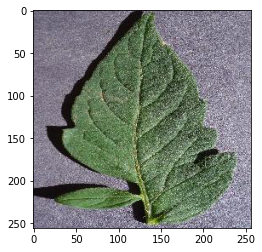

In [ ]:
# Test the transformation setup.
# The image will be different each time this cell is run.

aug_image = augment_image(aug_types, image)

plt.imshow(aug_image)

In [ ]:
df_train.head()

In [ ]:
def train_generator(batch_size=8):

    while True:

        # load the data in chunks (batches)
        for df in pd.read_csv('df_train.csv.gz', chunksize=batch_size):

            # get the list of images
            image_id_list = list(df['image'])

            # Create empty X matrix - 3 channels
            X_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)




            # Create X_train
            #================

            for i in range(0, len(image_id_list)):


                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)

                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))




            # Create y_train
            # ===============
                cols = ["target_Bacterial_spot",
                        "target_Early_blight",
                        "target_Late_blight",
                        "target_Leaf_mold",
                        "target_Septoria_leaf_spot",
                        "target_Spider_mites",
                        "target_Target_Spot",
                        "target_Tomato_Yellow_Leaf_Curl_Virus",
                        "target_Mosaic_virus",
                        "target_Healthy",]
                y_train = df[cols]
                y_train = np.asarray(y_train)

                # change the shape to (batch_size, 1)
                #y_train = y_train.reshape((-1, 1)) # -1 tells numpy to automatically detect the batch size


            # Augment the image and mask
            # ===========================

                aug_image = augment_image(aug_types, image)

                # insert the image into X_train
                X_train[i] = aug_image



            # Normalize the images
            X_train = X_train/255

            yield X_train, y_train

In [ ]:
# Test the generator

# initialize
train_gen = train_generator(batch_size=8)

# run the generator
X_train, y_train = next(train_gen)

print(X_train.shape)
print(y_train.shape)

In [ ]:
y_train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# Print the first image in X_train
# Remember that train images have been augmented.

image = X_train[0,:,:,:]
plt.imshow(image)

In [ ]:
def val_generator(batch_size=5):

    while True:

        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):

            # get the list of images
            image_id_list = list(df['image'])

            # Create empty X matrix - 3 channels
            X_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)




            # Create X_val
            #================

            for i in range(0, len(image_id_list)):


                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)

                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_val[i] = image




            # Create y_val
            # ===============

                cols = ["target_Bacterial_spot",
                        "target_Early_blight",
                        "target_Late_blight",
                        "target_Leaf_mold",
                        "target_Septoria_leaf_spot",
                        "target_Spider_mites",
                        "target_Target_Spot",
                        "target_Tomato_Yellow_Leaf_Curl_Virus",
                        "target_Mosaic_virus",
                        "target_Healthy",]
                y_val = df[cols]
                y_val = np.asarray(y_val)

                # change the shape to (batch_size, 1)
                #y_val = y_val.reshape((-1, 1)) # -1 tells numpy to automatically detect the batch size





            # Normalize the images
            X_val = X_val/255

            yield X_val, y_val

In [ ]:
# Test the validation generator

# initialize
val_gen = val_generator(batch_size=5)

# run the generator
X_val, y_val = next(val_gen)

print(X_val.shape)
print(y_val.shape)

In [ ]:
y_val

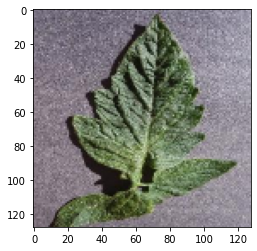

In [ ]:
# print the image from X_val
image = X_val[0,:,:,:]
plt.imshow(image)

In [ ]:
def test_generator(batch_size=1):

    while True:

        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):

            # get the list of images
            image_id_list = list(df['image'])

            # Create empty X matrix - 3 channels
            X_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)




            # Create X_test
            #================

            for i in range(0, len(image_id_list)):


                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)

                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_test[i] = image



            # Normalize the images
            X_test = X_test/255

            yield X_test

In [ ]:
# Test the generator

# initialize
test_gen = test_generator(batch_size=1)

# run the generator
X_test = next(test_gen)

print(X_test.shape)

(1, 128, 128, 3)


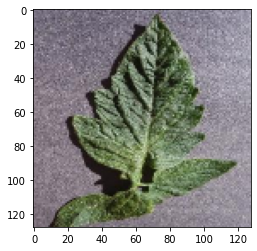

In [ ]:
# print the image from X_test

image = X_test[0,:,:,:]
plt.imshow(image)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from sklearn.preprocessing import Binarizer
from sklearn import metrics
from math import pi,gamma,sin
from scipy.special import erf
import random
import math
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from tqdm import tqdm_notebook
from copy import deepcopy
from numpy.matlib import repmat
import warnings
warnings.filterwarnings('ignore')


#HyperParameter

In [ ]:
TRAIN_BATCH_SIZE = 8
VAL_BATCH_SIZE = 5
EPOCH = 10


num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = TRAIN_BATCH_SIZE
val_batch_size = VAL_BATCH_SIZE

# determine numtrain steps
train_steps = np.ceil(num_train_samples / train_batch_size)
# determine num val steps
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                        ModelCheckpoint, CSVLogger, LearningRateScheduler)

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import os
import datetime
import cv2

from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1 import RunOptions

from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.preprocessing import LabelBinarizer
from hyperactive import Hyperactive

#Baseline

In [ ]:
print(X_train.shape[1:])

(128, 128, 3)


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [ ]:
#Import the Inception V3 library as shown below. We will be using imagenet weights
#include_top = False is set since we do not want our first and last layers from the original V3net
IMAGE_SIZE = [128, 128]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
#our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/My Drive/Colab Notebooks/Tomato_Leaf_Dataset/train/*')

In [ ]:
#add last layer with no of folders in train(no of output classes). If multiple classes use softmax activation or binary use sigmoid
prediction = Dense(len(folders), activation='softmax')(x)


# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                        ModelCheckpoint, CSVLogger, LearningRateScheduler)

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np
import os
import datetime
import cv2

from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.compat.v1 import RunOptions

from keras.utils.vis_utils import plot_model
#from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.preprocessing import LabelBinarizer
#from hyperactive import Hyperactive

In [ ]:
model_pretrained = Sequential()
model_pretrained.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Conv2D(32, (3, 3)))
model_pretrained.add(Activation("relu"))
model_pretrained.add(MaxPooling2D(pool_size=(2, 2)))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Conv2D(32, (3, 3), padding="same"))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.25))

model_pretrained.add(Flatten())
model_pretrained.add(Dense(200))
model_pretrained.add(Activation("relu"))
model_pretrained.add(Dropout(0.5))
model_pretrained.add(Dense(10))
model_pretrained.add(Activation("softmax"))

In [ ]:
#add last layer with no of folders in train(no of output classes). If multiple classes use softmax activation or binary use sigmoid
prediction = Dense(len(folders), activation='softmax')(x)


# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 63, 63, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 63, 63, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 63, 63, 32)   0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
# Initialize the generators
train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

model_pretrained.compile(
    Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)



filepath = "model_baseline.h5"

#earlystopper = EarlyStopping(patience=10, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,
                                   #verbose=1, mode='min')



log_fname = 'training_log.csv'
csv_logger = CSVLogger(filename=log_fname,
                       separator=',',
                       append=False)

callbacks_list = [checkpoint, csv_logger]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
%%time
history = model_pretrained.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=EPOCH,
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)


Epoch 1/10
1250/1250 [==============================] - 72s 57ms/step - loss: 1.8263 - accuracy: 0.3449 - val_loss: 1.1558 - val_accuracy: 0.6010
Epoch 2/10
1250/1250 [==============================] - 70s 56ms/step - loss: 1.2926 - accuracy: 0.5570 - val_loss: 0.8336 - val_accuracy: 0.7290
Epoch 3/10
1250/1250 [==============================] - 71s 57ms/step - loss: 1.1296 - accuracy: 0.6102 - val_loss: 0.7313 - val_accuracy: 0.7730
Epoch 4/10
1250/1250 [==============================] - 71s 57ms/step - loss: 1.0379 - accuracy: 0.6455 - val_loss: 0.6225 - val_accuracy: 0.8020
Epoch 5/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.9311 - accuracy: 0.6788 - val_loss: 0.6616 - val_accuracy: 0.7770
Epoch 6/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.8719 - accuracy: 0.6981 - val_loss: 0.5174 - val_accuracy: 0.8340
Epoch 7/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.8232 - accuracy: 0.7187 - val_loss: 0.5393 -

##Trained

In [ ]:
!gdown https://drive.google.com/uc?id=1-7RQvlazTEAN3_MbG1nC4wMQkEPqVyUS

Permission denied: https://drive.google.com/uc?id=1-7RQvlazTEAN3_MbG1nC4wMQkEPqVyUS
Maybe you need to change permission over 'Anyone with the link'?


In [ ]:
from tensorflow.keras.backend import clear_session
clear_session()
X_train = np.asarray(X_train, order="C") #fix ndarray is not C-contiguous
y_train = np.asarray(y_train, order="C") #fix ndarray is not C-contiguous


def conv1(model):
    model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same",
                     activation='relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    return model


def conv2(model):
    model.add(Conv2D(filters=128,kernel_size=(3,3), padding="same",
                     activation='relu'))
    return model


def conv3(model):
    return model

def build(x_train, y_train):


    def cnn(para, X_train, y_train):
        """
        model = Sequential()
        model.add(
            Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:])
        )
        model.add(Activation("relu"))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation("relu"))


        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        model.add(Conv2D(32, (3, 3), padding="same"))
        model.add(Activation("relu"))
        """

        model = load_model("pretrained_model.h5")
        print("Model Loaded!")

        model = para["conv_layer.0"](model)
        model.add(Dropout(0.25, name='drop_out'))

        model = para["conv_layer.1"](model)
        model.add(Dropout(0.25, name='drop_out2'))

        model.add(Flatten())
        model.add(Dense(para["neurons.0"], activation="relu"))
        model.add(Dropout(0.5, name='drop_out3'))
        model.add(Dense(10, activation="softmax"))

        run_opts = RunOptions(report_tensor_allocations_upon_oom = True) #OOM Fix

        train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
        val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

        model.compile(
            Adam(lr=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'],
        )



        filepath = "model_enas.h5"

        #earlystopper = EarlyStopping(patience=10, verbose=1)

        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                                    save_best_only=True, mode='max')

        #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,
                                          #verbose=1, mode='min')



        log_fname = 'training_log_enas.csv'
        csv_logger = CSVLogger(filename=log_fname,
                              separator=',',
                              append=False)

        callbacks_list = [checkpoint, csv_logger]

        history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=EPOCH,
                                      validation_data=val_gen, validation_steps=val_steps,
                                    verbose=1,
                                    callbacks=callbacks_list)

        _, score = model.evaluate(x=X_val, y=y_val)

        return score


    search_config = {
        cnn: {
            "conv_layer.0": [conv1, conv2, conv3],
            "conv_layer.1": [conv1, conv2, conv3],
            "neurons.0": range(100, 1000, 100)}
    }


    opt = Hyperactive(X_train, y_train)
    #opt.search(search_config, optimizer="Bayesian", n_iter=3,)

In [ ]:
%%time
build(X_train, y_train)

CPU times: user 28 µs, sys: 2 µs, total: 30 µs
Wall time: 48.4 µs


#Saving Model to GDrive

In [ ]:
#Saving model to GDrive

!cp model_baseline.h5 '/content/drive/My Drive/Bangkit/Final Project/model/V2'
!cp pretrained_model.h5 '/content/drive/My Drive/Bangkit/Final Project/model/V2'
!cp model_enas.h5 '/content/drive/My Drive/Bangkit/Final Project/model/V2'

!cp training_log.csv '/content/drive/My Drive/Bangkit/Final Project/model/V2'
!cp training_log_pretrained.csv '/content/drive/My Drive/Bangkit/Final Project/model/V2'
!cp training_log_enas.csv '/content/drive/My Drive/Bangkit/Final Project/model/V2'

cp: cannot create regular file '/content/drive/My Drive/Bangkit/Final Project/model/V2': No such file or directory
cp: cannot create regular file '/content/drive/My Drive/Bangkit/Final Project/model/V2': No such file or directory
cp: cannot stat 'model_enas.h5': No such file or directory
cp: cannot create regular file '/content/drive/My Drive/Bangkit/Final Project/model/V2': No such file or directory
cp: cannot create regular file '/content/drive/My Drive/Bangkit/Final Project/model/V2': No such file or directory
cp: cannot stat 'training_log_enas.csv': No such file or directory


#EVALUATION

##Test

In [ ]:
!gdown https://drive.google.com/uc?id=1IYRA85OklCfimAre-nTO4H7yj7JZm0FE
!gdown https://drive.google.com/uc?id=1-8DmPGQeKX6jgRiwzG347fVgWkivp6pB

Downloading...
From: https://drive.google.com/uc?id=1IYRA85OklCfimAre-nTO4H7yj7JZm0FE
To: /content/model_baseline.h5
305MB [00:02, 121MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-8DmPGQeKX6jgRiwzG347fVgWkivp6pB
To: /content/model_enas.h5
592MB [00:04, 118MB/s] 


In [ ]:
model_normal = load_model("/content/model_baseline.h5")
#model_enas = load_model("model_enas.h5")

In [ ]:
%%time

val_gen = val_generator(batch_size=1)

val_loss, val_acc = model_normal.evaluate_generator(val_gen,
                        steps=len(df_val))

print("============BASELINE=================")
print('val_loss:', val_loss)
print('val_acc:', val_acc)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


============BASELINE=================
val_loss: 0.37893930077552795
val_acc: 0.8830000162124634
CPU times: user 10.8 s, sys: 2.29 s, total: 13.1 s
Wall time: 9.77 s


##Confusion Matrix

In [ ]:
# Function Definition

def conf_matrix(conf, label, title):

  fig, ax = plt.subplots(figsize = (7,7))
  ax.matshow(conf, cmap='Pastel1')
  plt.title(title)
  ax.set_ylabel('True Values')
  ax.set_xlabel('Predicted Values', labelpad = 10)
  ax.xaxis.set_label_position('bottom')

  for (i, j), z in np.ndenumerate(conf):
      ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

  ax.set_xticks(np.arange(10), label)
  ax.set_yticks(np.arange(10), label)

  plt.show()


In [ ]:
test_gen_baseline = test_generator(batch_size=1)
baseline = model_normal.predict_generator(test_gen_baseline, steps=len(df_val), verbose=1)

#test_gen_enas = test_generator(batch_size=1)
#enas = model_enas.predict_generator(test_gen_enas, steps=len(df_val), verbose=1)

   1/1000 [..............................] - ETA: 2:07

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1000/1000 [==============================] - 7s 7ms/step


In [ ]:
y_pred_baseline = np.argmax(baseline, axis=1)
#y_pred_vgg = np.argmax(vgg, axis=1)
#y_pred_enas = np.argmax(enas, axis=1)

# get y_true as index values

label = ["target_Bacterial_spot",
        "target_Early_blight",
        "target_Late_blight",
        "target_Leaf_mold",
        "target_Septoria_leaf_spot",
        "target_Spider_mites",
        "target_Target_Spot",
        "target_Tomato_Yellow_Leaf_Curl_Virus",
        "target_Mosaic_virus",
        "target_Healthy",]

y_true = df_val[label]
y_true = np.asarray(y_true)
y_true = np.argmax(y_true, axis=1)


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

#cm_enas = confusion_matrix(y_true, y_pred_enas)
cm_baseline = confusion_matrix(y_true, y_pred_baseline)
#cm_vgg = confusion_matrix(y_true, y_pred_vgg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


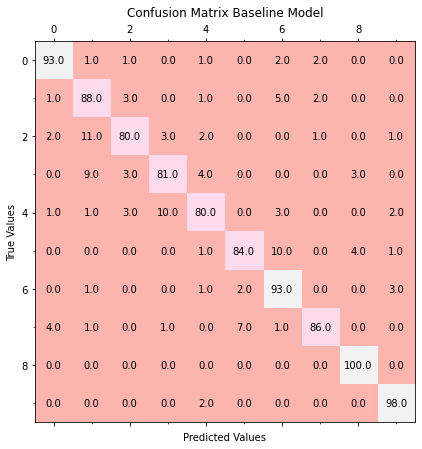

In [ ]:
conf_matrix(cm_baseline, label, title='Confusion Matrix Baseline Model')
#conf_matrix(cm_enas, label, title='Confusion Matrix ENAS Model')

##Classification Report (Precission, Recall, F1-Score)

Recall = Given a class, will the classifier be able to detect it?

Precision = Given a class prediction from a classifier, how likely is it to be correct?

F1 Score = The harmonic mean of the recall and precision. Essentially, it punishes extreme values.

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report_baseline = classification_report(y_true, y_pred_baseline, target_names=["target_Bacterial_spot",
                  "target_Early_blight",
                  "target_Late_blight",
                  "target_Leaf_mold",
                  "target_Septoria_leaf_spot",
                  "target_Spider_mites",
                  "target_Target_Spot",
                  "target_Tomato_Yellow_Leaf_Curl_Virus",
                  "target_Mosaic_virus",
                  "target_Healthy",])

print(report_baseline)

                                      precision    recall  f1-score   support

               target_Bacterial_spot       0.92      0.93      0.93       100
                 target_Early_blight       0.79      0.88      0.83       100
                  target_Late_blight       0.89      0.80      0.84       100
                    target_Leaf_mold       0.85      0.81      0.83       100
           target_Septoria_leaf_spot       0.87      0.80      0.83       100
                 target_Spider_mites       0.90      0.84      0.87       100
                  target_Target_Spot       0.82      0.93      0.87       100
target_Tomato_Yellow_Leaf_Curl_Virus       0.95      0.86      0.90       100
                 target_Mosaic_virus       0.93      1.00      0.97       100
                      target_Healthy       0.93      0.98      0.96       100

                            accuracy                           0.88      1000
                           macro avg       0.88      0.88     

## Training Plot

In [ ]:

def plot_history(history, title):
  plt.figure(figsize=(16,9))
  plt.grid()
  plt.plot(history.accuracy)
  plt.plot(history.val_accuracy)

  plt.title('Model Accuracy ['+title+']')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'], loc='upper left')
  plt.show()

  plt.figure(figsize=(16,9))
  plt.grid()
  plt.plot(history.loss)
  plt.plot(history.val_loss)

  plt.title('Model Loss ['+title+']')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Validation'], loc='upper right')
  plt.show()

In [ ]:
!gdown https://drive.google.com/uc?id=1-LnY8obMkr75poYP_VgagLeDmJy35bLi
!gdown https://drive.google.com/uc?id=1-F03LoJsMZgcAyCMQ7E9N5ocZPNoSEwe

Permission denied: https://drive.google.com/uc?id=1-LnY8obMkr75poYP_VgagLeDmJy35bLi
Maybe you need to change permission over 'Anyone with the link'?
Permission denied: https://drive.google.com/uc?id=1-F03LoJsMZgcAyCMQ7E9N5ocZPNoSEwe
Maybe you need to change permission over 'Anyone with the link'?


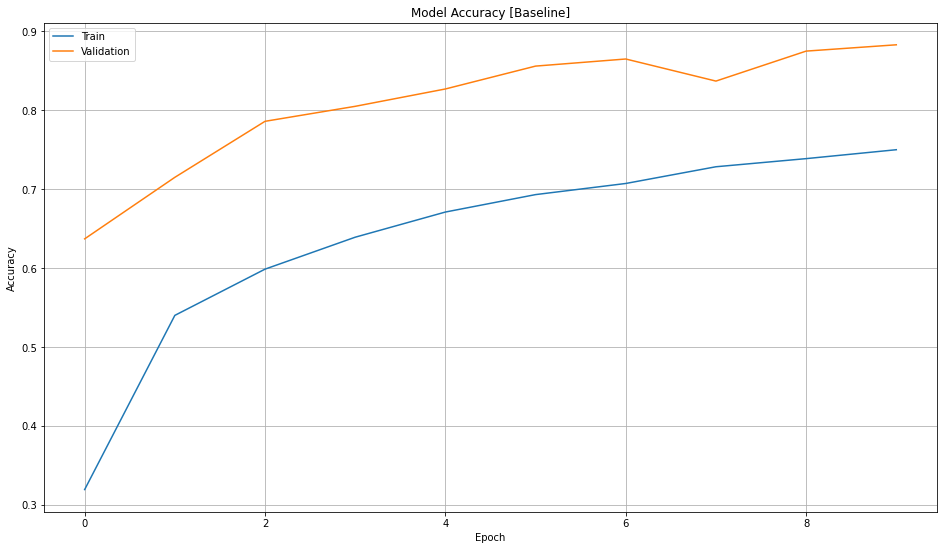

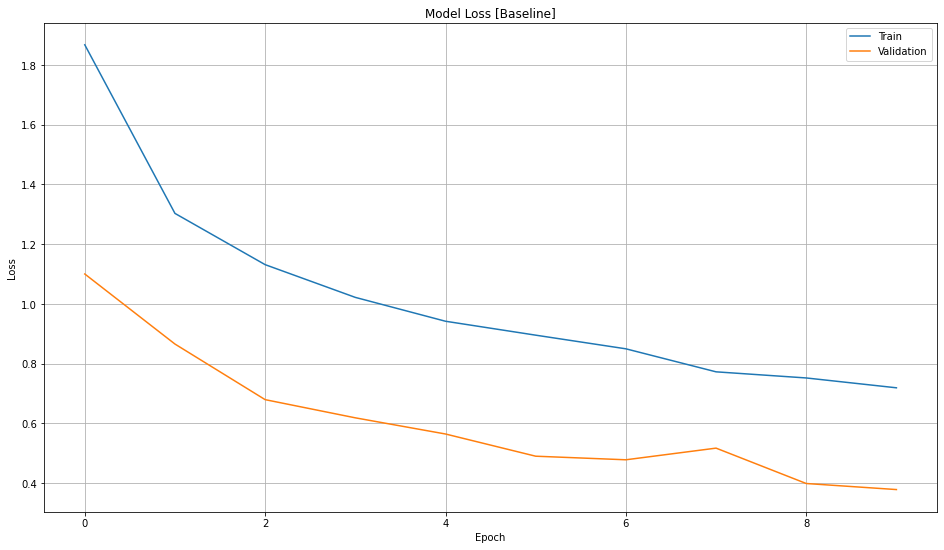

In [ ]:
import pandas as pd
import numpy as np

baseline_ = pd.read_csv('training_log.csv')
plot_history(baseline_, 'Baseline')

#enas_ = pd.read_csv('training_log_enas.csv')
#plot_history(enas_, 'Model By ENAS')

##Test Uploaded File

In [ ]:
from google.colab import files
image = files.upload()

In [ ]:
DEFAULT_IMAGE_SIZE = tuple((128,128))

def img_to_np(DIR,flatten=True):
  #canny edge detection by resizing
  cv_img=mpimg.imread(DIR,0)
  cv_img=cv2.resize(cv_img,DEFAULT_IMAGE_SIZE)
  img = np.uint8(cv_img)
  #img = np.uint8((0.2126 * img[:,:,0]) + np.uint8(0.7152 * img[:,:,1]) + np.uint8(0.0722 * img[:,:,2]))
  #flatten it
  if(flatten):
    img=img.flatten()
  return img

In [ ]:
labels = ["Bacterial_spot",
          "Early_blight",
          "Late_blight",
          "Leaf_mold",
          "Septoria_leaf_spot",
          "Spider_mites",
          "Target_Spot",
          "Tomato_Yellow_Leaf_Curl_Virus",
          "Mosaic_virus",
          "Healthy",]

arr=img_to_np("/content/septoria.jpg",flatten=False)
arr=arr.reshape(1,IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)

pred_baseline = model_enas.predict(arr)[0]
pred_enas = model_normal.predict(arr)[0]

print('The Baseline Model predict the picture as', labels[np.argmax(pred_baseline)])
print('The New Model predict the picture as', labels[np.argmax(pred_enas)])